# Preliminary Data Analysis

First we need to load and clean the data



In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from vectorSubsets import *
from driverCleanData import cleanData
%matplotlib inline
[shtNoNan] = cleanData();

There are 0 duplicates


I coded each selection as Cannot Perform = 0, Choose Not To Perform = 1, Very Difficult = 2, Slightly Difficult = 3, Easy = 4

FYI I coded things such as "I do not wear shoes with laces" as 0, which implies that they "cannot perform" the activity.  This could be changed to NaN, however then it would reduce our sample size to 24

The activities under the banner of OPUS are:

In [2]:
print(opus)

['TieShoesWithDevice', 'AttachZipper', 'ButtonShirt', 'PutOnSocks', 'BrushCombHair', 'PlaceToothpasteToothbrush', 'BrushTeeth', 'Shave', 'UseMobilPhone', 'CarryLargeBox', 'OpenEnvelope', 'UseScissors', 'FoldBathTowel', 'UseHammerToDriveNail', 'StirFoodInBowl', 'PourDrinkFromBottle', 'UseForkAndSpoon', 'DrinkFromPaperPlastic', 'CutMeat', 'UseKeyboard']


The first 5 response scores are below:

In [3]:
shtNoNan.opusScore.head()

2    71
3    73
4    72
5    54
6    68
Name: opusScore, dtype: int64

## Summary statistics

In [5]:
opS = shtNoNan.opusScore.dropna()
opS.describe()

count    909.000000
mean      59.647965
std        8.562246
min       20.000000
25%       54.000000
50%       58.000000
75%       65.000000
max       80.000000
Name: opusScore, dtype: float64

In [6]:
stats.mode(opS)

ModeResult(mode=array([53], dtype=int64), count=array([67]))

From the above information we have a mean of 60, a mode of 53.  The 25th percentile of 54 gives us the perception that most of the data is lumped above a score of 50.  This is good information this means that most people are at least performing the OPUS activites.  I.e. $ \frac{50}{20} = 2.5 \approx 3 =$ Slightly Difficult.

We can double check this by inspecting the mode for each question.

In [7]:
stats.mode(shtNoNan[opus]).mode

array([[3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]], dtype=int64)

The mode for each question is 3 or 4.

What are the counts, how many people are selecting 3 or 4 on each question.

In [8]:
stats.mode(shtNoNan[opus]).count

array([[460, 341, 381, 438, 422, 378, 447, 431, 383, 458, 451, 484, 483,
        398, 537, 442, 452, 403, 466, 472]])

On the first question 460 people selected 3, that is over half of our data! 

On average how many people selected 3 or 4 on each question:

In [9]:
stats.mode(shtNoNan[opus]).count.mean()

436.35000000000002

In [11]:
_9/len(shtNoNan.Age)

0.48003300330033005

On average 436 people selected 3 or 4 on a question, which is 48% of our sample.

What is the standard deviation?

In [12]:
np.std(stats.mode(shtNoNan[opus]).count)

44.489633624025274

44.5, which is not too large considering our sample is 900+, so this is less than 10%.  

Thus our respondents for the most part are selecting 3 = Slightly Difficult or 4 = Easy.  So the other responses are providing very little information.

## Histogram


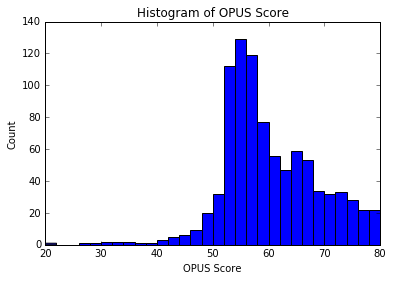

In [14]:
plt.hist(opS, bins=30)
plt.xlabel("OPUS Score")
plt.ylabel("Count")
plt.title("Histogram of OPUS Score")
#plt.xlim([26,79])
plt.show()

Our data is mostly normal, provided the groupings are sufficiently close, it is skewed left a bit.  If our binning is not wide, we begin to see bimodality arise, because the respondents were selecting 3 and 4 predominately.

# Significance

I investigated the significance levels of the (weighted) opus scores of the ETD vs. various other categories.  I used the Two-Sample T Test to investigate significance, because:
* We have one dependent variable (Opus Score) and one independent variable (Type of TD)
* The independent variable has two groupings
* For the most part normality holds
* I suspect that homogenity of variance holds, since the respondents primarily select Slighlty Difficulty and Easy, also the standard deviations are within a reasonable neighborhood of one another

Let's look at ETD vs. All others first

#### Opus -- ETD vs. All others

The ETD's stats are first followed by all others

In [15]:
shtNoNan["opusScoreETD"] = shtNoNan.opusScore[shtNoNan["PrimaryTerminalDevice"]== "Motion Control (MC) ETD"]
shtNoNan.opusScoreETD.dropna().describe()

count    49.000000
mean     57.204082
std       8.746379
min      33.000000
25%      54.000000
50%      56.000000
75%      61.000000
max      76.000000
Name: opusScoreETD, dtype: float64

In [16]:
shtNoNan["opusScoreNotETD"] = shtNoNan.opusScore[shtNoNan["PrimaryTerminalDevice"] != "Motion Control (MC) ETD"]
shtNoNan.opusScoreNotETD.dropna().describe()

count    860.000000
mean      59.787209
std        8.535761
min       20.000000
25%       54.000000
50%       58.000000
75%       66.000000
max       80.000000
Name: opusScoreNotETD, dtype: float64

The standard deviations are within acceptable bounds, especially given the limited sample of the ETD.  The means are not very different, especially considering the standard deviations, so I suspect we will find that this difference is insignificant.

The ETD is still hurting from a lack of observations (only have 13!). Forging ahead let's look at the kind of significance we get

In [17]:
stats.ttest_ind(shtNoNan.opusScoreETD.dropna(), shtNoNan.opusScoreNotETD.dropna())

Ttest_indResult(statistic=-2.0577642467330626, pvalue=0.039898097659168977)

We have a p-value of 0.62, this is getting closer to signficance.  Perhaps with a larger ETD sample it will get pushed further.  

What does the histogram look like:
What about with the weighted opus?

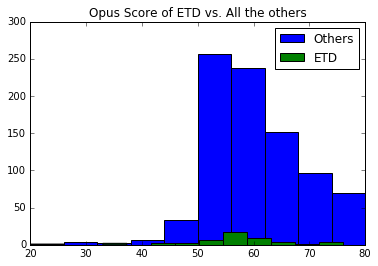

In [18]:
plt.hist(shtNoNan["opusScoreNotETD"].dropna(), label = "Others")
plt.hist(shtNoNan.opusScoreETD.dropna(), label = "ETD")
plt.title("Opus Score of ETD vs. All the others")
plt.legend()
plt.show()

It appears as if the ETD is shifted right slightly, let's wait until we have more data to make a more conclusive decision.

#### Weighted Opus -- ETD vs. All Others

Check summary stats first, the ETD's stats come first then all others.

In [19]:
shtNoNan["weightedOpusScoreETD"] = shtNoNan.weightedOpusScore[shtNoNan["PrimaryTerminalDevice"] == "Motion Control (MC) ETD"]
shtNoNan["weightedOpusScoreNoETD"] = shtNoNan.weightedOpusScore[shtNoNan["PrimaryTerminalDevice"] != "Motion Control (MC) ETD"]
shtNoNan.weightedOpusScoreETD.dropna().describe()

count     49.000000
mean      85.469388
std       17.111280
min       44.000000
25%       80.000000
50%       83.000000
75%       91.000000
max      149.000000
Name: weightedOpusScoreETD, dtype: float64

In [20]:
shtNoNan.weightedOpusScoreNoETD.dropna().describe()

count    860.000000
mean      89.943023
std       16.675853
min       17.000000
25%       81.000000
50%       87.000000
75%       97.000000
max      156.000000
Name: weightedOpusScoreNoETD, dtype: float64

Our standard deviations are still pretty tight, and the means are not too different, what does the p-value look like:

In [21]:
stats.ttest_ind(shtNoNan.weightedOpusScoreETD.dropna(), shtNoNan.weightedOpusScoreNoETD.dropna())

Ttest_indResult(statistic=-1.8240248670769144, pvalue=0.068477236401495764)

Not significant.  Further the significance in the weighted opus is higher.  This could be due to how people are considering importance.  I investigate this further later.

Let's look at the histograms

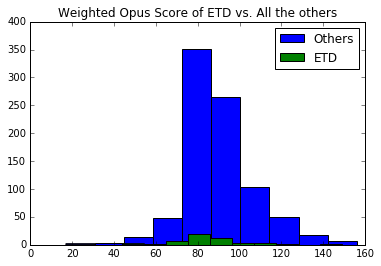

In [22]:
plt.hist(shtNoNan.weightedOpusScoreNoETD.dropna(), label="Others")
plt.hist(shtNoNan.weightedOpusScoreETD.dropna(), label = "ETD")
plt.title("Weighted Opus Score of ETD vs. All the others")
plt.legend()
plt.show()

The ETD looks slightly shifted to the right, but too early to tell.

### Significance between ETD and Articulating
#### Opus Score -- ETD vs. Articulating

What are the summary stats for the Articulating group

In [23]:
from vectorSubsets import articulatingHandsNoETD
shtNoNan["opusScoreArticulating"] = shtNoNan.opusScore[shtNoNan["PrimaryTerminalDevice"].isin(articulatingHandsNoETD)]
shtNoNan["weightedOpusScoreArticulating"] = shtNoNan.weightedOpusScore[shtNoNan["PrimaryTerminalDevice"].isin(articulatingHandsNoETD)]
shtNoNan.opusScoreArticulating.dropna().describe()

count    139.000000
mean      57.021583
std        6.635945
min       28.000000
25%       53.000000
50%       56.000000
75%       60.000000
max       75.000000
Name: opusScoreArticulating, dtype: float64

In [24]:
print("The mean for the ETD is {0} and the standard deviation is {1}".format(shtNoNan.opusScoreETD.dropna().mean(), shtNoNan.opusScoreETD.dropna().std()))

The mean for the ETD is 57.204081632653065 and the standard deviation is 8.746379231422793


The standard deviation for the articulating group is getting a little narrow compared to the ETD, but the means are beginning to show some difference.

Let's look at the histogram to see if we are comfortable assuming homegenity of variance

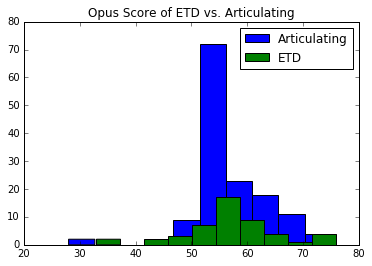

In [25]:
plt.hist(shtNoNan.opusScoreArticulating.dropna(), label="Articulating")
plt.hist(shtNoNan.opusScoreETD.dropna(), label = "ETD")
plt.title("Opus Score of ETD vs. Articulating")
plt.legend()
plt.show()

The spread of both distributions looks similar, let's assume we still have homogenity of variance.

In [26]:
stats.ttest_ind(shtNoNan.opusScoreETD.dropna(), shtNoNan.opusScoreArticulating.dropna())

Ttest_indResult(statistic=0.15172793673064736, pvalue=0.87956596659119601)

In [27]:
print("The mean of the ETD is {0}.  The mean of the articulating hands is {1}".format(shtNoNan.opusScoreETD.dropna().mean(), shtNoNan.opusScoreArticulating.dropna().mean()))

The mean of the ETD is 57.204081632653065.  The mean of the articulating hands is 57.02158273381295


Assuming the variance is the same it looks like the ETD's higher score on opus is significant (p-value = 0.0381) when compared to articulating TD's.

What  if the variances are not the same?  Let's take a quick peek at the Welch's T-Test to find out

In [28]:
stats.ttest_ind(shtNoNan.opusScoreETD.dropna(), shtNoNan.opusScoreArticulating.dropna(), equal_var=False)

Ttest_indResult(statistic=0.13317146004360164, pvalue=0.8944483674819752)

If we relax the assumption that the variances are equal then the p-value becomes 0.1392, pretty low still (for our data sample).  This is a good indication that ETD wearers might find tasks easier to perform than articulating hand wearers.

#### Weighted Opus -- ETD vs. Articulating

Taking a look at the summary stats for articulating users

In [29]:
shtNoNan.weightedOpusScoreArticulating.dropna().describe()

count    139.000000
mean      86.712230
std       11.311303
min       42.000000
25%       82.000000
50%       86.000000
75%       91.000000
max      130.000000
Name: weightedOpusScoreArticulating, dtype: float64

In [30]:
print("The mean of the ETD is {0}.  The standard deviation for ETD is {1}".format(shtNoNan.weightedOpusScoreETD.dropna().mean(), shtNoNan.weightedOpusScoreETD.dropna().std()))

The mean of the ETD is 85.46938775510205.  The standard deviation for ETD is 17.111280442075252


Lets take a quick look at histogram to make sure we can assume the variances are the same.

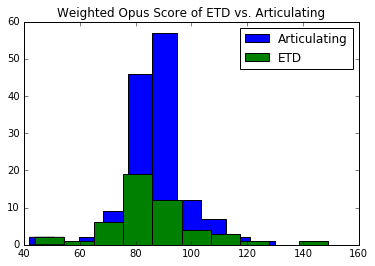

In [51]:
plt.hist(shtNoNan.weightedOpusScoreArticulating.dropna(), label="Articulating")
plt.hist(shtNoNan.weightedOpusScoreETD.dropna(), label = "ETD")
plt.title("Weighted Opus Score of ETD vs. Articulating")
plt.legend()
plt.show()

Looks good with the new data!

In [52]:
stats.ttest_ind(shtNoNan.weightedOpusScoreETD.dropna(), shtNoNan.weightedOpusScoreArticulating.dropna())

Ttest_indResult(statistic=-0.57292292595733318, pvalue=0.56738883057490663)

No significance.

### ETD vs. Hooks (All)
#### Opus -- ETD vs. Hooks

Let's take a look at the histogram for opus and weighted opus of all the hooks

In [33]:
from vectorSubsets import hooksNoETD
shtNoNan["hooksOpus"] = shtNoNan.opusScore[shtNoNan.PrimaryTerminalDevice.isin(hooksNoETD)]
shtNoNan["hooksOpusWeighted"] = shtNoNan.weightedOpusScore[shtNoNan.PrimaryTerminalDevice.isin(hooksNoETD)]
print("The mean score on OPUS for ETD {0}, for Hooks {1}".format(shtNoNan.opusScoreETD.dropna().mean(), shtNoNan.hooksOpus.dropna().mean()))
print("The mean score on weighted OPUS for ETD {0}, for Hooks {1}".format(shtNoNan.weightedOpusScoreETD.dropna().mean(), shtNoNan.hooksOpusWeighted.dropna().mean()))

The mean score on OPUS for ETD 57.204081632653065, for Hooks 61.74074074074074
The mean score on weighted OPUS for ETD 85.46938775510205, for Hooks 92.03703703703704


The averages do not look too seperated.  Let's look at the histograms see if we can assume normaility and homogenity of variance

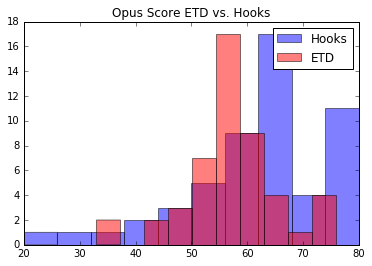

In [55]:
plt.hist(shtNoNan.hooksOpus.dropna(), color='b', alpha=0.5, label="Hooks")
plt.hist(shtNoNan.opusScoreETD.dropna(), color='r', alpha=0.5, label="ETD")
plt.legend()
plt.title("Opus Score ETD vs. Hooks")
plt.show()

Close enough to normal, we have some bimodality going on though.

What about weighted opus

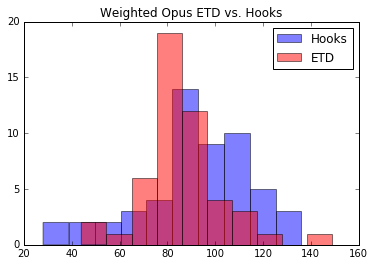

In [56]:
plt.hist(shtNoNan.hooksOpusWeighted.dropna(), color='b', alpha=0.5, label="Hooks")
plt.hist(shtNoNan.weightedOpusScoreETD.dropna(), color='r', alpha=0.5, label="ETD")
plt.legend()
plt.title("Weighted Opus ETD vs. Hooks")
plt.show()

Both look fairly normal, and the spreads look comparable.  Let's forge on and look at the significance.

In [36]:
stats.ttest_ind(shtNoNan.opusScoreETD.dropna(), shtNoNan.hooksOpus.dropna())

Ttest_indResult(statistic=-2.0753509750073107, pvalue=0.040495083913793146)

In [37]:
stats.ttest_ind(shtNoNan.weightedOpusScoreETD.dropna(), shtNoNan.hooksOpusWeighted.dropna())

Ttest_indResult(statistic=-1.5842996203065898, pvalue=0.11625182470128004)

The p-values for both situations are too high to reject the null, but I suspect if we have more than 30 ETD wearers we would be able to make firmer conclusions.  Again notice that the p-value for the weighted is again higher.

### Analysis of increase of p-value in weighted opus

A higher p-value on the weighted opus score as compared to the opus is very intriguing.  On the surface it says that when we include what tasks each respondents find important the ETD's higher score on opus becomes insignificant!  A possible hypothesis to explain this result is that the wearers become accoustomed to what they can perform with their TDs and what they cannot perform.  They then update their value system to place importance on what they can perform and to devalue what they can "no longer" (assuming they did) perform. TBD -- test the hypothesis by looking at new prosthesis wearers and what they find important, consider this group the control, subset this group by TD

Let's try to find out why the p-value is consistently larger for the weighted opus score.  

Remember 2 = very important

Since the difference between ETD and articulating was significant let's start there.

In [38]:
ETDsht = shtNoNan[shtNoNan.PrimaryTerminalDevice == "Motion Control (MC) ETD"]
ETDsht[importanceFull].dropna().mean().sort_values(ascending=False).head()

ImportanceUsingForkSpoon       1.673469
ImportanceUsingScissors        1.653061
ImportanceOpeningAnEnvelope    1.612245
ImportanceUsingKeyboard        1.612245
ImportanceShaving              1.551020
dtype: float64

In [39]:
articSht = shtNoNan[shtNoNan.PrimaryTerminalDevice.isin(articulatingHandsNoETD)]
articSht[importanceFull].mean().sort_values(ascending=False).head()

ImportanceUsingKeyboard                  1.719424
ImportanceBrushingTeeth                  1.719424
ImportancePuttingToothpasteToothbrush    1.683453
ImportanceCuttingMeat                    1.676259
ImportanceShaving                        1.661871
dtype: float64

In [40]:
hookSht = shtNoNan[shtNoNan.PrimaryTerminalDevice.isin(hooksNoETD)]
hookSht[importanceFull].mean().sort_values(ascending=False).head()

ImportanceShaving                     1.611111
ImportanceFingerTips                  1.555556
ImportancePuttingOnSocks              1.555556
ImportanceDrinkingFromPaperPlastic    1.537037
ImportanceUsingHammer                 1.518519
dtype: float64

In [41]:
ETDsht[importanceFull].mean().sort_values(ascending=False).head().index[ETDsht[importanceFull].mean().sort_values(ascending=False).head().index.isin(articSht[importanceFull].mean().sort_values(ascending=False).head().index)]

Index(['ImportanceUsingKeyboard', 'ImportanceShaving'], dtype='object')

People who use the ETD or articulating find it important to put toothpaste on toothbrush and shave.

In [42]:
ETDsht[importanceFull].mean().sort_values(ascending=False).head().index[ETDsht[importanceFull].mean().sort_values(ascending=False).head().index.isin(hookSht[importanceFull].mean().sort_values(ascending=False).head().index)]

Index(['ImportanceShaving'], dtype='object')

Whereas people who use ETD or electric find it important to use a fork and spoon, put toothpast on toothbrush and shave

### Significance of new tasks
Let's look at the significance of the new tasks

First we need the score

In [43]:
shtNoNan["newTasks"]=shtNoNan.taskScore - shtNoNan.opusScore

Then we need to normalize the scores

In [44]:
shtNoNan["newTasks"]= (shtNoNan["newTasks"]-shtNoNan["newTasks"].mean())/(shtNoNan["newTasks"].std())

In [45]:
shtNoNan["opusNormed"] = (shtNoNan.opusScore-shtNoNan.opusScore.mean())/shtNoNan.opusScore.std()

In [46]:
stats.ttest_rel(shtNoNan.opusNormed, shtNoNan.newTasks)

Ttest_relResult(statistic=4.4527403380830504e-15, pvalue=0.99999999999999645)

It seems like the mean score on the opus tasks and the mean score on the new tasks are relatively similar

Let's look at the weighted versions

In [47]:
shtNoNan["newTasksWeighted"]=shtNoNan.weightedTaskScore - shtNoNan.weightedOpusScore
shtNoNan["newTasksWeighted"]= (shtNoNan["newTasksWeighted"]-shtNoNan["newTasksWeighted"].mean())/(shtNoNan["newTasksWeighted"].std())
shtNoNan["opusNormedWeighted"] = (shtNoNan.weightedOpusScore-shtNoNan.weightedOpusScore.mean())/shtNoNan.weightedOpusScore.std()
stats.ttest_rel(shtNoNan.opusNormedWeighted,shtNoNan.newTasksWeighted)

Ttest_relResult(statistic=5.1603865697876158e-15, pvalue=0.99999999999999589)

The mean scores in the new tasks and opus are very similiar

## Correlation

The correlations between all the opus tasks are below

In [48]:
opcor = shtNoNan[opus].corr()
opcor

,TieShoesWithDevice,AttachZipper,ButtonShirt,PutOnSocks,BrushCombHair,PlaceToothpasteToothbrush,BrushTeeth,Shave,UseMobilPhone,CarryLargeBox,OpenEnvelope,UseScissors,FoldBathTowel,UseHammerToDriveNail,StirFoodInBowl,PourDrinkFromBottle,UseForkAndSpoon,DrinkFromPaperPlastic,CutMeat,UseKeyboard
TieShoesWithDevice,1.000000,0.588540,0.531420,0.196892,0.259543,-0.116802,0.293002,0.228273,-0.040125,0.365880,0.135191,0.048902,0.156552,0.478057,0.169282,-0.035316,0.144178,-0.130782,0.225887,0.014181
AttachZipper,0.588540,1.000000,0.378487,0.134339,0.155842,-0.109771,0.247767,0.224522,-0.042813,0.264281,0.126657,0.036982,0.110396,0.434244,0.157901,-0.086621,0.096971,-0.142527,0.208193,0.035606
ButtonShirt,0.531420,0.378487,1.000000,0.230768,0.204934,0.095018,0.312670,0.243253,0.083257,0.202639,0.233932,0.093753,0.212221,0.328163,0.249015,0.032680,0.241739,0.059277,0.229894,0.143459
PutOnSocks,0.196892,0.134339,0.230768,1.000000,0.164782,0.220443,0.274635,0.110337,0.272800,0.123677,0.257095,0.153019,0.203846,0.119074,0.236177,0.192719,0.205243,0.155550,0.223410,0.232650
BrushCombHair,0.259543,0.155842,0.204934,0.164782,1.000000,0.234252,0.357895,0.164313,0.333943,0.159350,0.281361,0.243996,0.258398,0.106855,0.245629,0.206138,0.235353,0.227606,0.299653,0.264531
PlaceToothpasteToothbrush,-0.116802,-0.109771,0.095018,0.220443,0.234252,1.000000,0.279192,0.059881,0.525566,0.023225,0.353946,0.234535,0.255973,-0.132468,0.305761,0.319230,0.318497,0.330687,0.305053,0.368230
BrushTeeth,0.293002,0.247767,0.312670,0.274635,0.357895,0.279192,1.000000,0.157716,0.434951,0.228312,0.412313,0.248979,0.301505,0.135023,0.341159,0.289952,0.337021,0.286961,0.346924,0.317861
Shave,0.228273,0.224522,0.243253,0.110337,0.164313,0.059881,0.157716,1.000000,0.092281,0.186217,0.127133,0.156350,0.161827,0.295133,0.180909,0.123067,0.141134,0.098672,0.199137,0.183492
UseMobilPhone,-0.040125,-0.042813,0.083257,0.272800,0.333943,0.525566,0.434951,0.092281,1.000000,0.003966,0.323851,0.250624,0.328347,-0.092899,0.399991,0.352833,0.358199,0.334638,0.375306,0.525513
CarryLargeBox,0.365880,0.264281,0.202639,0.123677,0.159350,0.023225,0.228312,0.186217,0.003966,1.000000,0.073542,0.199845,0.245184,0.355032,0.185111,0.128241,0.115363,0.072897,0.173509,0.016583


In [60]:
opcor[opcor>0.5]

,TieShoesWithDevice,AttachZipper,ButtonShirt,PutOnSocks,BrushCombHair,PlaceToothpasteToothbrush,BrushTeeth,Shave,UseMobilPhone,CarryLargeBox,OpenEnvelope,UseScissors,FoldBathTowel,UseHammerToDriveNail,StirFoodInBowl,PourDrinkFromBottle,UseForkAndSpoon,DrinkFromPaperPlastic,CutMeat,UseKeyboard
TieShoesWithDevice,1.00000,0.58854,0.53142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AttachZipper,0.58854,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ButtonShirt,0.53142,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PutOnSocks,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BrushCombHair,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PlaceToothpasteToothbrush,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.525566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BrushTeeth,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Shave,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UseMobilPhone,NaN,NaN,NaN,NaN,NaN,0.525566,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.525513
CarryLargeBox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The increase in data, erased many of the correlations we saw.